<font style='font-size:1.5em'>**💻 Week 05 lab – JSON output, HTML obfuscation + more scrapping practice** </font>

<font style='font-size:1.2em'>DS105A – Data for Data Science</font>

**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io) & [Alex Soldatkin](https://github.com/alex-soldatkin)

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: Practice some more web scraping techniques using the GiHub website as a source of data.

**LAST REVISION:** 26 October 2023

::: callout-important

## This lab is part of the ![](/figures/logos/GENIAL_favicon.png){width=1em}  [<span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project](https://lse-dsi.github.io/genial). 

If you never accessed ChatGPT, you must create an account. Click on [chat.openai.com](https://chat.openai.com/) and sign up with your email address (it doesn't have to be your LSE email address).

When you reach Part III of this lab, read the specific instructions for GENIAL participants.

:::


--- 

**⚙️ The setup**

We will use the same libraries as in the previous lab:

In [1]:

import requests               # This is how we access the web
import pandas as pd           # This is how we work with data frames

from pprint import pprint     # Print things in a pretty way
from scrapy import Selector   # This is how we parse HTML


🖇️ **Useful links:**

- [`requests` documentation](https://docs.python-requests.org/en/latest/)
- [`scrapy` CSS & XPath selectors](https://docs.scrapy.org/en/latest/topics/selectors.html#working-with-text)
- [Postman](https://www.postman.com), a tool to test API requests
- [URL Encode/Decode](https://www.url-encode-decode.com/)
- [JSONCrack](https://jsoncrack.com/editor), a tool to visualise JSON structure
- 📚 Week 04 Appendix 01
- 🛣️ Week 04 Lab Roadmap
- 👨‍🏫 W05 Lecture notebook

We will start differently this time, **there is no structured 🧑‍🏫 TEACHING MOMENT** and you can jump straight into the tasks. 

Of course, your class teacher will be around helping you with any questions and they might invite everyone's attention if they feel that a particular topic is worth discussing with the whole class.

We will also use TWO websites in our examples today: GitHub and Wikipedia.

----

# Part I: 📜 When the response output is a JSON... (20 min)


## 1.1 A closer look at URLs

🎯 **ACTION POINTS:**

1. Open the [GitHub Advanced Search](https://github.com/search/advanced) page.

2. On the main search bar, type `data science` and press `Enter`. You will be taken to a page with the results of your search and take a look at the URL of the page. It should look like this:

    ```
    https://github.com/search?q=data+science&type=Repositories&ref=advsearch&l=&l=
    ```

    Notice that your **query** was added to the URL as a parameter called `q` and that the value of this parameter is `data+science`. The `+` sign is a special character that means "space" in URLs. Notice, also, that your query also shows up in the search bar of the results page.

3. Does the number of results change if you search for `"data science"` (with the quotes)? Why?

    > 👉 _Remove this line and write your answer here._    

3. Let's find out all the cool public data science projects on GitHub that uses Jupyter Notebooks! 

    Go back to the Advanced Search, keep the `data science` query but change the "Written in this language" option to `Jupyter Notebooks` and hit Search again. 
    
    What changed in the URL? How was your new parameter added to the URL? How does that match the text you see in the search bar?

    > 👉 _Remove this line and write your observations here._ 

<div style="width:50%;font-size:0.9em;border:1px solid #20794D;border-radius:1em;padding:1em;background-color:#f3f8f6;">

💡 Recall that in the Week 04 Lecture notebook, we mentioned that text has to **encoded** in order to be represented by computers. There are many standards for text encoding, but the most common one is called [UTF-8](https://en.wikipedia.org/wiki/UTF-8). On top of the usual encoding, URLs have to be [**percent-encoded**](https://www.wikiwand.com/en/Percent-encoding) (see also [this table](https://www.degraeve.com/reference/urlencoding.php))

Do you see how all of that relates to your observations above?

Try to read the links in this tip to understand things a bit better. If you get stuck, ask your class teacher for help.

</div>

5. Write the python code to get the results of your search. What do you get? How is that different from previous web scraping responses?

    > 👉 _Remove this line and write your observations here._

## 1.2 A trick: visualising JSON data

As you might have noticed the results come back in a JSON format, not in HTML code. This is because GitHub has an API that allows you to access their data in a structured way. **If you see JSON, rejoice!** It means that you can easily extract the data you need by navigating the JSON structure and you don't have to worry about parsing HTML code with selectors. Keep in mind that this is more of an exception than a rule, so more often than not you will have to use selectors. There are also some 'hidden APIs', ie. APIs that are not documented, but you can still find them by inspecting the network traffic of your browser. If you want to learn more abou that and how to use them, check out our blog post. 

In order to understand the structure of the JSON file (which will be different for every API you query), you can use tools like [JSONCrack](https://jsoncrack.com/editor) or simply prety printing the resulting dictionary in your notebook. With JSONCrack, you can simply paste the resulting JSON and see its nodes, then use the search function to find the information you need, and then write down a path to replicate in your code.  Here is what an example of this visualisation should look like:



It is all highly nested. Keep in mind that single arrows represent indexing into a **dictionary** (with a <span style="color: #55a7e7;">light blue</span> font in JSONCrack), and multiple arrows show that you are dealing with a **list** (written in an <span style="color: #f99a40;">orange</span> font). For example, to get to this dictionary: 

```json 
{
  "header_redesign_enabled": false,
  "type": "repositories",
  "page": 1,
  "page_count": 100,
  "elapsed_millis": 211,
  "result_count": 383368,
  "topics": null,
  "query_id": "",
  "logged_in": false,
  "sign_up_path": "/signup?source=code_search_results",
  "sign_in_path": "/login?return_to=https%3A%2F%2Fgithub.com%2Fsearch%3Fq%3Ddata%2Bscience%26type%3DRepositories%26ref%3Dadvsearch%26l%3D%26l%3D",
  "metadata": null
}
```

you would use the following path: `response.json()['payload']`, which means that you are indexing into the resulting dictionary with the key `payload`. You can also click on a node and see the path to it in JavaScript notation: `{Root}.payload`. `{Root}` represents the JSON object itself, which we have called `response.json()` in our code, and `.payload` is equivalent to `<dict name>['payload']` in Python.

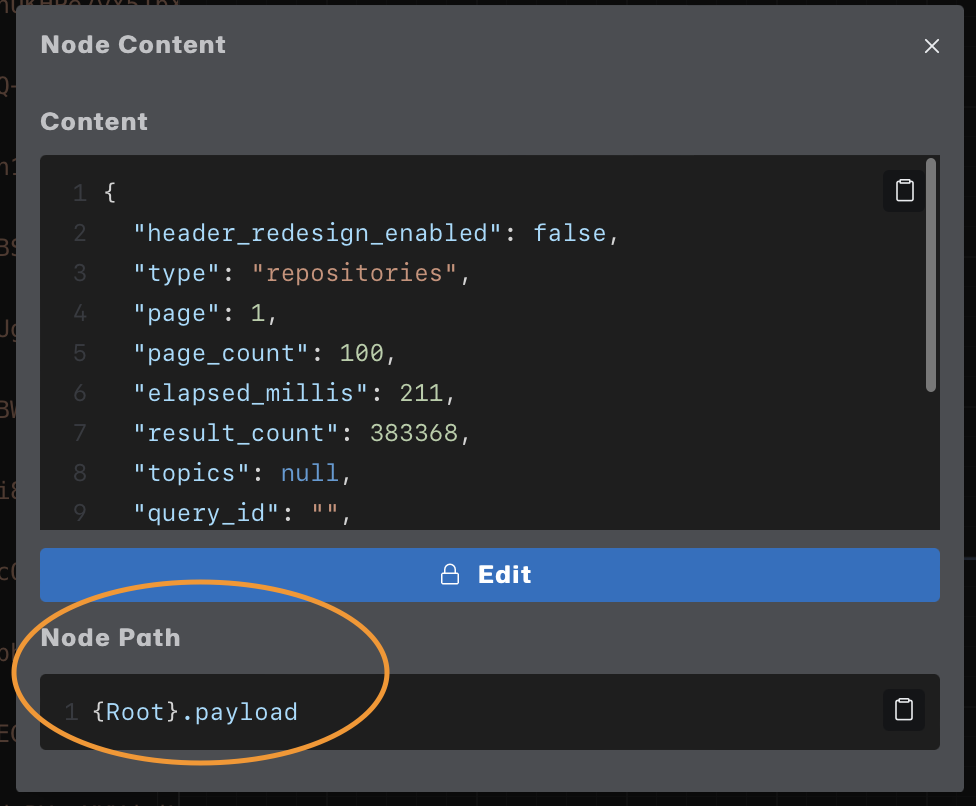

Usually when you have to access a list of dictionaries, you will have to loop over the list and then access the dictionaries inside the loop. 

🎯 **ACTION POINTS:**

1. Can you find the first search result here? What is the path to it?
2. Can you find the total number of pages available? How about the curent page? What are their paths?

👉 _Delete this line and write your answers here._

## 1.3 Tip: Postman delivers

Tools like [Postman](https://www.postman.com) and [Insomnia](https://insomnia.rest) are very useful when exploring APIs. You can use them to make requests to an API and see the response in a more structured way or even to test your own APIs. 

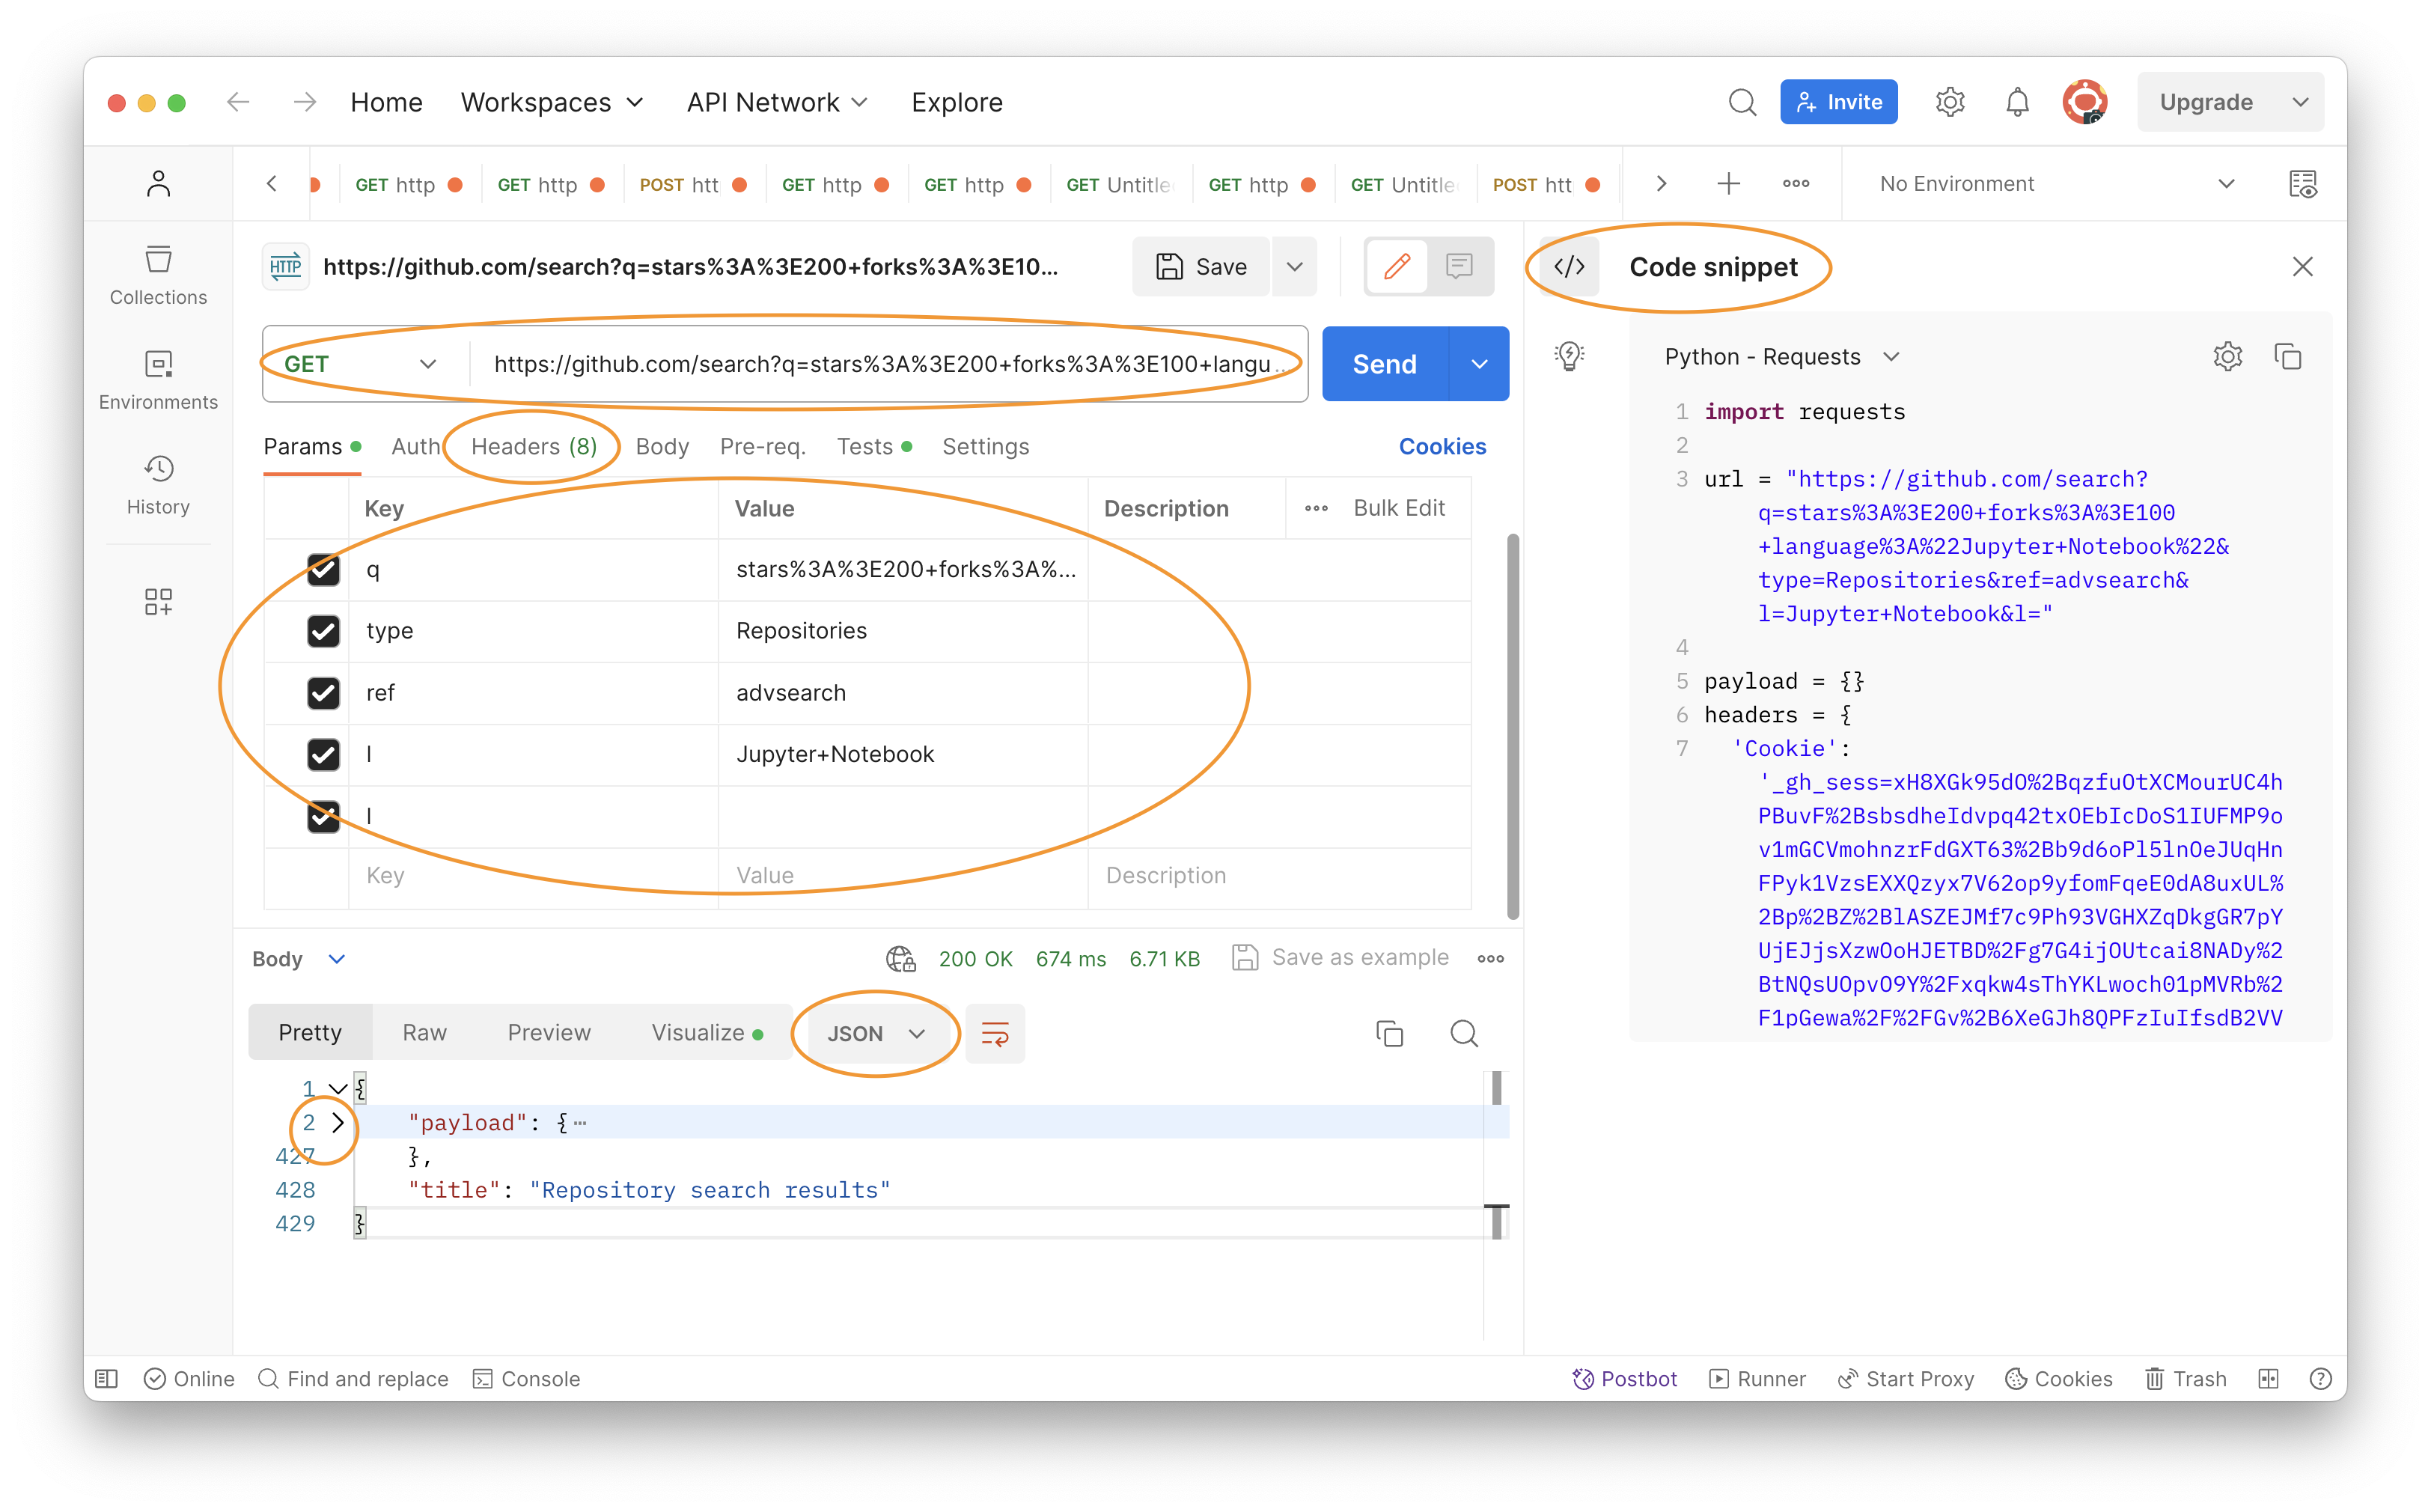


Notice a few things here:

- The URL we used is the first thing that pops up and is the address Postman will use to make the request.
- The HTTP method is `GET`, which is the default method for most APIs, though some will require you to use `POST`.
- The response is in JSON format, which is the default format for most APIs, though some will provide `XML` or `HTML`.
- The URL parameters are listed below the URL and you can try deleting a few to see how your response changes. If you add a `p` parameter and set it to `2`, you will get the second page of the search results.
- The headers might be useful if you are having trouble making the request via `requests` in Python, just copy them over and try again. 
- The toggles for the JSON output are useful if you want to see the response in a more structured way. Try collapsing the `payload` node and notice how this corresponds to the JSONCrack output above.
- The `Code` button is very useful if you want to copy over the headers (including cookies) and the URL parameters to your Python code.
- The `q` (= query) parameter is responsible for the advanced search query, but it is percent-encoded. You can use [URL Encode/Decode](https://www.url-encode-decode.com/) to decode it and see what it looks like.

```python
query = 'stars:>200 forks:>100 language:"Jupyter Notebook"'
query_encoded = 'stars%3A%3E200+forks%3A%3E100+language%3A%22Jupyter+Notebook%22'
```

<div style="background-color:#f9f9f9;color:#e0e0e0">

🥚 **Easter Egg:** if you are reading this notebook closely, you will like to know that the DS105 public webpage has a blog section. One of the posts is about Postman and Hidden APIs.

</div>

----



---

# Part II: 🥸 Obfuscation (20 min)

<div style="width:50%;font-size:0.9em;border:1px solid #20794D;border-radius:1em;padding:1em;background-color:#f3f8f6;">

⚠️ We WILL NOT write Python code in this part, you should just use your browser's developer tools to inspect the HTML code and use CSS/XPath selectors to extract the information you need.

</div>

🎯 **ACTION POINTS:**

1. Write down the URL that would return the results of searching for GitHub repositories that:

    - contain `"data science"` (with the quotes) in their titles or descriptions
    - have at least 200 stars
    - have at least 100 forks
    - are written in Jupyter Notebooks


👉 _Remove this line and write your answer here._


🎯 **ACTION POINTS (cont.):**

**This question is a challenge, so don't worry if you can't fully solve it.** If after some 20 minutes, you can't find the answer, open the commentary in the markdown cell below and read it.

2. Write the CSS or XPath selector (your choice) that captures the following information from the repositories in the results page:
    - the title of the repository
    - the URL of the repository
    - the number of stars
    - the last time the repository was updated
    
    DO NOT WRITE PYTHON CODE, just practice your selectors on the browser's console.

👉 _Remove this line and add your selectors here_

In [5]:
# erase this line and write your code here

<details style="border: 1px solid #20794D; border-radius: 5px; padding: 0.5em;">
<summary style="font-weight:bold;margin-top:0.5em;margin-bottom:0.5em;font-size:1.4em;">COMMENTARY <small style="font-weight:normal">(only read after you actively tried to write the selectors above)</small></summary>

You will notice that this page is a lot more difficult to scrape than the ones we've been using so far. The classes and IDs are **obfuscated** (like `div.Box-sc-g0xbh4-0.kXssRI`) -- they look like a random string of characters. This is intentional because GitHub actively tries to prevent web scraping by **obfuscating** the HTML code. You will encounter the same style of obfuscation in many other websites, particularly does that have a lot of user-generated content where this data is their most valuable asset.

<div style="width:50%;font-size:0.9em;border:1px solid #20794D;border-radius:1em;padding:1em;background-color:#f3f8f6;">
💡 The recent boom in interest in generative AI tools brought by the popularity of ChatGPT led many companies to increase their efforts to prevent web scraping. After all, most of the success of these tools is due to the fact that they were trained on large amounts of data scraped from the web. 
</div>

GitHub's Terms & Conditions state that:

> ### 7. [Information Usage Restrictions](https://docs.github.com/en/site-policy/acceptable-use-policies/github-acceptable-use-policies#7-information-usage-restrictions)
> 
> You may use information from our Service for the following reasons, regardless of whether the information was scraped, collected through our API, or obtained otherwise:
>
>    Researchers may use public, non-personal information from the Service for research purposes, only if any publications resulting from that research are [open access](https://en.wikipedia.org/wiki/Open_access).
>    Archivists may use public information from the Service for archival purposes.
>
> Scraping refers to extracting information from our Service via an automated process, such as a bot or webcrawler. Scraping does not refer to the collection of information through our API. Please see Section H of our [Terms of Service](https://docs.github.com/en/site-policy/github-terms/github-terms-of-service#h-api-terms) for our API Terms.
>
> You may not use information from the Service (whether scraped, collected through our API, or obtained otherwise) for spamming purposes, including for the purposes of sending unsolicited emails to users or selling personal information, such as to recruiters, headhunters, and job boards.
>
> Your use of information from the Service must comply with the [GitHub Privacy Statement](https://docs.github.com/en/site-policy/privacy-policies/github-privacy-statement).

</details>

---

# Part III: Wikipedia, a webscraping-friendly website (50 min)

<details style="border: 1px solid #D55816; border-radius: 5px; padding: 0.5em;">
<summary style="font-weight:bold;margin-top:0.5em;margin-bottom:0.5em;font-size:1.4em;"> I am part of the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project</summary>

If you are participating in the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project, you are asked to:

- Work independently (not in groups or pairs), but you can ask the class teacher for help if you get stuck.

- Have **only** the following tabs open in your browser:

    1. These lab instructions

    2. The [ChatGPT](https://chat.openai.com) website (**open a new chat window and name it 'DS105A - Week 05'**)

    3. Any of the 🖇️ **Useful links** at the top of this notebook

- What you **CANNOT** do:

    1. Use a search engine for help

    2. Use any other websites (for example, **do not** use StackOverflow or GitHub here)

    3. Talk to your classmates


- Be aware of how useful (or not) ChatGPT was in helping you answer the questions in this section.

- **Fill out this brief survey at the end of the lab:** 🔗 [link](https://forms.office.com/e/h0dXriciyy) (requires LSE login)

</details>

<br>

<details style="border: 1px solid gray; border-radius: 5px; padding: 0.5em;">
<summary style="font-weight:bold;margin-top:0.5em;margin-bottom:0.5em;font-size:1.4em;"> I'm not participating in the GENIAL project :\</summary>

In case you are not participating in the <span style="font-weight:bold"> GEN<font color='#D55816'>IA</font>L</span> project, you can work in pairs or small groups to answer the questions in this section. You can also ask the class teacher for help if you get stuck.

We suggest you have these tabs open in your browser:

1. Any of the 🖇️ **Useful links** at the top of this notebook

</details>


Let's get you started with Wikipedia data. You will need this for your upcoming assignment (worth 30% of your final grade).

There is a lot here and it is unlikely you will be able to finish it all within the lab time. You can practice at home and ask us for help on Slack if you get stuck.

🎯 **ACTION POINTS:**

When following these action points, add the necessary markdown and code cells below. It's okay if it gets messey when you are in **prototyping mode**. You can always clean it up later.

1. Write the python code to send a request to Wikipedia's main English page and save the response in a variable called `response`.

2. Wikipedia developers ask that people identify themselves when sending a request via programming, as opposed to just browsing the page. This is done by setting the `User-Agent` parameter in the **request header**.  Read more about this on the `requests` library documentation [here](https://requests.readthedocs.io/en/latest/user/quickstart/#custom-headers).

    Now, go back to your code and edit it so that you pass a header to the requests in the form of a Python dictionary:

    ```python
    {'User-Agent': 'Webscraping practice  (<YOUR_EMAIL_ADDRESS>)'}
    ```
    
    where `<YOUR_EMAIL_ADDRESS>` is your email address.

    <div style="width:50%;font-size:0.9em;border:1px solid #20794D;border-radius:1em;padding:1em;background-color:#f3f8f6;">
    🤔 Why do this? Wikipedia is a non-profit organisation that relies on donations to keep their servers running. They also have a limited number of servers and a lot of traffic. So they want to make sure that people are not abusing their servers by sending too many requests. If you don't identify yourself, they might block your IP address.
    </div>

3. Write `scrapy` code to select the container representing the `<div>` element that comes _right after_ the title "From today's featured article". Call it `featured_article`.

4. Now extract and print **just the text** from the `featured_article` container.

5. Extract all the `<a>` elements from the `featured_article` container. Call it `featured_article_links`.

6. Update your `featured_article_links` object to keep only the links that point to other Wikipedia pages.

7. Convert the `featured_article_links` object to a **single data frame** with two columns: `href` and `title`. Your data frame will look somewhat like this:

    |href                                                   |title                                          |
    |:------------------------------------------------------|:----------------------------------------------|
    |https://en.wikipedia.org/wiki/Paint_It_Black                                   |Paint It Black                                 |
    |https://en.wikipedia.org/wiki/The_Rolling_Stones                               |The Rolling Stones                             |
    |https://en.wikipedia.org/wiki/Single_(music)                                   |Single (music)                                 |
    |    ...                                                |    ...                                        |


    Call it `df_feat_links`.



## 🏡 BONUS TASKS

Practice for your upcoming assignment by doing the following:

1. Focusing just on the first link in your `df_feat_links`, send a request to the corresponding URL and extract the inside ALL `<h2>` headers from that page.

2. Transform the code you wrote above to a function called `get_h2_headers()` that takes a URL as an argument and returns a list of all the `<h2>` headers in that page.

    For example:

    ```python
    def get_h2_headers(url):
        # your code here
        ...

        return h2_headers
    ``` 

3. Use the `get_h2_headers()` function to extract the `<h2>` headers from all the links in your `df_feat_links` data frame.  

    Here you have a choice: you can do a `for` loop, or you can use the line of 🐼 pandas code provided below:

    ```python
    all_h2_headers = df_feat_links['href'].apply(get_h2_headers_df)
    ```

    Which method do you prefer? The `for` loop or the `pd.apply()` method? Why?


4. Now, you are to create a new data frame **for each link** in your `df_feat_links`. Each data frame must contain:

    - `original_url`: the original URL from which you extracted this link (in this case, Wikipedia's main page)
    - `url`: the URL from which the `<h2>` header was extracted.
    - `page_title`: the title of the page from which the `<h2>` header was extracted.
    - `header`: the text contained in the `<h2>` header.

5. Create a function called `get_h2_headers_df()` that takes a URL as an argument and returns a data frame with the information above.

    For example:

    ```python
    def get_h2_headers_df(url):
        # your code here
        ...

        return df
    ```

6. Use the `get_h2_headers_df()` function to extract the `<h2>` headers from all the links in your `df_feat_links` data frame:

    ```python
    all_h2_headers = df_feat_links['href'].apply(get_h2_headers_df)
    ```

7. Bind all the data frames together into a single data frame called `df_h2_headers` using the 🐼 pandas `concat()` function.

    ```python
    df_h2_headers = pd.concat(all_h2_headers)
    ```


<div style="width:70%;border:1px solid #20794D;border-radius:1em;padding:1em;background-color:#f3f8f6;">

💡 **FINAL WORDS:** Whenever you found a valid solution to a programming problem, try to go back and 'clean it up'. 

Print the guide below and glue it to your bathroom mirror, and recite as a mantra first thing in the morning:

- Try to rewrite `for` loops as **list** or **dict comprehensions**.
- Check your lists to see if they wouldn't be better represented as **Python sets** or **Python dictionaries** instead.
- Identify the parts that are reusable and put them in **custom Python functions**. 
- Separate sections of your code into different cells, each with a clear purpose.
- Add markdown cells in between to explain concisely your thought process.
- Add inline comments, with the `#` symbol, to lines of code that are particularly complex or that you think might be hard to understand for someone else reading your code.

In the 🖇️ **Useful links**, look at our previous notebooks for examples of the process highlighted in the bullet points above.

</div>